Analyze time-series fluorescence data from PURE (Protein synthesis Using Recombinant Elements) experiments. 

# 20251208 Analysis (Group 2)  

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the cdk platereader module
from cdk.analysis.cytosol import platereader as pr

# Set up plotting
pr.plot_setup()

## Load Data

In [2]:
# Specify file paths
data_file = "./platereader/20251208-cytation3-pure-timecourse-gfp-developer-cell-WS-group-2-biotek-cdk.txt"
platemap_file = "platemap-G2.csv"

# Load data
data, platemap = pr.load_platereader_data(
    data_file=data_file,
    platemap_file=platemap_file,
    platereader="biotek-cdk"  # Options: "cytation", "envision", "biotek-cdk"
)

# Checkout first few rows
data.head()

,Time,Well,Data,Row,Column,Read,Clock Time,Date,Experiment Name,Name,...,Ribosome Vol (uL),SMix Vol (uL),tRNA Vol (uL),DNA Vol (uL),RNase Inhib Vol (uL),PPK Vol (uL),polyP Vol (uL),Mg-Ace Vol (uL),Water vol (uL),Rxn Volume (uL)
0,0 days 00:00:00,B2,46,B,2,GFP-F-G35,2025-12-08 14:48:23,20251208,Cytosol_Group_2,CP/CK_1,...,1.80,3.00,1.00,0.24,0.50,NaN,NaN,0.40,1.86,10
1,0 days 00:05:00,B2,46,B,2,GFP-F-G35,2025-12-08 14:53:23,20251208,Cytosol_Group_2,CP/CK_1,...,1.80,3.00,1.00,0.24,0.50,NaN,NaN,0.40,1.86,10
2,0 days 00:10:00,B2,794,B,2,GFP-F-G35,2025-12-08 14:58:23,20251208,Cytosol_Group_2,CP/CK_1,...,1.80,3.00,1.00,0.24,0.50,NaN,NaN,0.40,1.86,10
3,0 days 00:15:00,B2,3850,B,2,GFP-F-G35,2025-12-08 15:03:23,20251208,Cytosol_Group_2,CP/CK_1,...,1.80,3.00,1.00,0.24,0.50,NaN,NaN,0.40,1.86,10
4,0 days 00:20:00,B2,8556,B,2,GFP-F-G35,2025-12-08 15:08:23,20251208,Cytosol_Group_2,CP/CK_1,...,1.80,3.00,1.00,0.24,0.50,NaN,NaN,0.40,1.86,10


## Plot Raw Curves

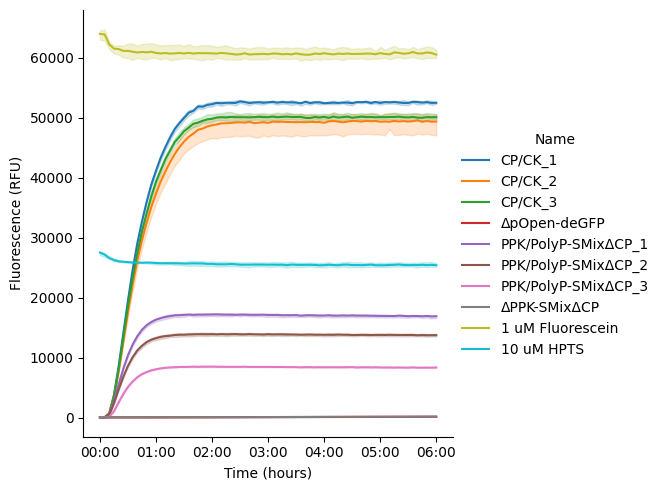

In [3]:
g = pr.plot_curves(data=data)

## Normalize Data

In [4]:
data = pr.normalize_data_to_controls(data, ctrl_name = '1 uM Fluorescein')

Data Normalized to 1 uM Fluorescein in col data_normalized. The active column for subsequent operations is: data_normalized


Now replot your curves to see them normalized

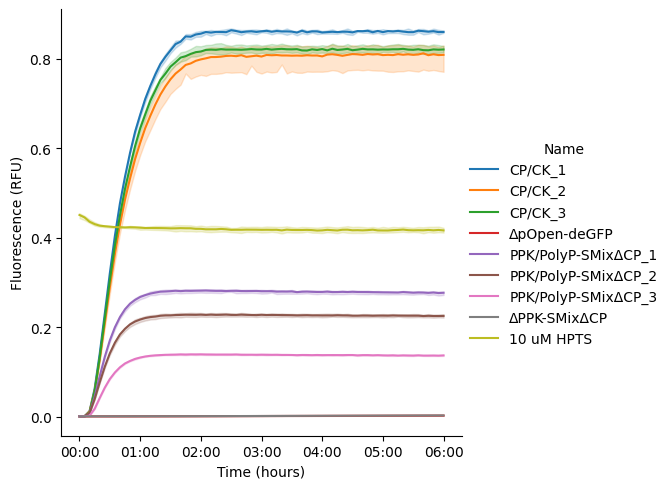

In [5]:
g = pr.plot_curves(data=data)

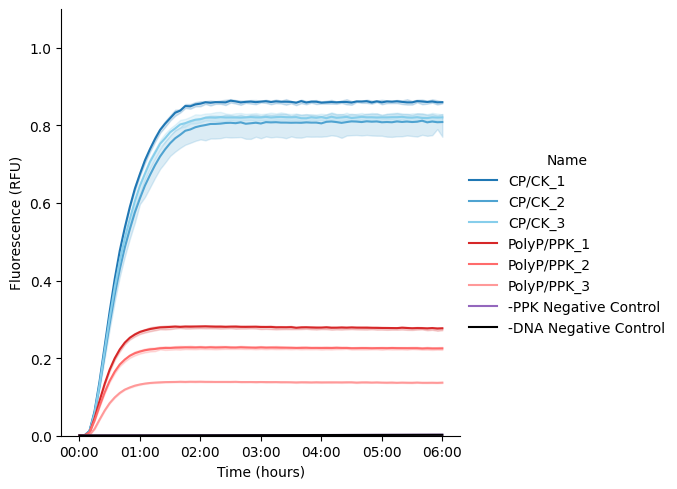

In [6]:
#| label: fig:kinetics-group2

replace_dict = {'ΔPPK-SMixΔCP':'-PPK Negative Control',
                'ΔpOpen-deGFP':'-DNA Negative Control',
                'PPK/PolyP-SMixΔCP_1': 'PolyP/PPK_1',
                'PPK/PolyP-SMixΔCP_2': 'PolyP/PPK_2',
                'PPK/PolyP-SMixΔCP_3': 'PolyP/PPK_3'
               }

custom_order = ['CP/CK_1',
                'CP/CK_2',
                'CP/CK_3',
                'PolyP/PPK_1', 
                'PolyP/PPK_2', 
                'PolyP/PPK_3', 
                '-PPK Negative Control', 
                '-DNA Negative Control']

color_dict = {
    'CP/CK_1': '#1f77b4',      # Dark blue
    'CP/CK_2': '#4fa3d1',      # Medium blue
    'CP/CK_3': '#87ceeb',      # Light blue
    'PolyP/PPK_1': '#d62728',  # Dark red
    'PolyP/PPK_2': '#ff6b6b',  # Medium red
    'PolyP/PPK_3': '#ff9999',  # Light red
    '-PPK Negative Control': '#9467bd',  # Purple
    '-DNA Negative Control': '#000000'   # Black
}

data_rename = data
data_rename['Name'] = data['Name'].replace(replace_dict)
p = pr.plot_curves(data_rename[data_rename["Sample Type"] != "Standard"], 
                   hue_order=custom_order, 
                   palette=color_dict)
p.set(ylim=(0, 1.1))
plt.savefig("kinetics-group2.png")

## Kinetic Analysis
**Metrics extracted:**

  - **Vmax** (`Velocity Max`): Maximum rate of fluorescence increase (slope at inflection point)
  - **Lag time**: Time to reach the exponential phase
  - **Steady-state**: Final fluorescence level and time to reach 95% of asymptote
  - **Drift**: Rate of signal decay or increase after steady-state
  - **R²**: Goodness of fit

In [8]:
# Perform kinetic analysis using sigmoid_drift model
kinetics = pr.kinetic_analysis(
    data=data,
    group_by=['Name'],  # Group by experimental condition
)

kinetics.head()

PROVIDING AVERAGED KINETICS


Velocity                       \
                                           Time data_normalized  Max   
Name                                                                   
-DNA Negative Control 0 days 04:03:19.952549830            0.00 0.00   
-PPK Negative Control 0 days 04:19:59.956423466            0.00 0.00   
10 uM HPTS            0 days 03:25:07.700612273            0.41 0.03   
CP/CK_1               0 days 00:36:38.538433266            0.44 0.96   
CP/CK_2               0 days 00:37:30.853832472            0.41 0.85   

                                              Lag                  \
                                             Time data_normalized   
Name                                                                
-DNA Negative Control   0 days 01:01:53.196869192            0.00   
-PPK Negative Control   0 days 01:35:35.046794993            0.00   
10 uM HPTS            -9 days +04:34:06.744993964            0.84   
CP/CK_1                 0 days 00:09:17.262746854            0.06   
CP/CK_2                 0 days 00:08:26.148628191            0.05   

                                    Steady State                  \
                                            Time data_normalized   
Name                                                               
-DNA Negative Control  0 days 08:30:27.646440464            0.00   
-PPK Negative Control  0 days 08:22:03.268640793            0.00   
10 uM HPTS            13 days 07:43:31.993904319            0.78   
CP/CK_1                0 days 01:16:54.856485698            0.83   
CP/CK_2                0 days 01:20:19.442837097            0.78   

                                                                     Fit       \
                                                                  params  R^2   
Name                                                                            
-DNA Negative Control  [0.0034479843398727596, 0.662049258988182, 4.0... 0.98   
-PPK Negative Control  [0.004221988097563466, 0.7303502192568923, 4.3... 0.95   
10 uM HPTS             [0.8261356014936059, 0.12618831220513657, 3.41... 0.56   
CP/CK_1                [0.8761170985412258, 4.387102554753816, 0.6107... 1.00   
CP/CK_2                [0.8235640326141648, 4.128413828321877, 0.6252... 1.00   

                             
                      drift  
Name                         
-DNA Negative Control -0.00  
-PPK Negative Control -0.00  
10 uM HPTS            -0.03  
CP/CK_1                0.01  
CP/CK_2                0.01

## Visualize Fits on Individual Wells

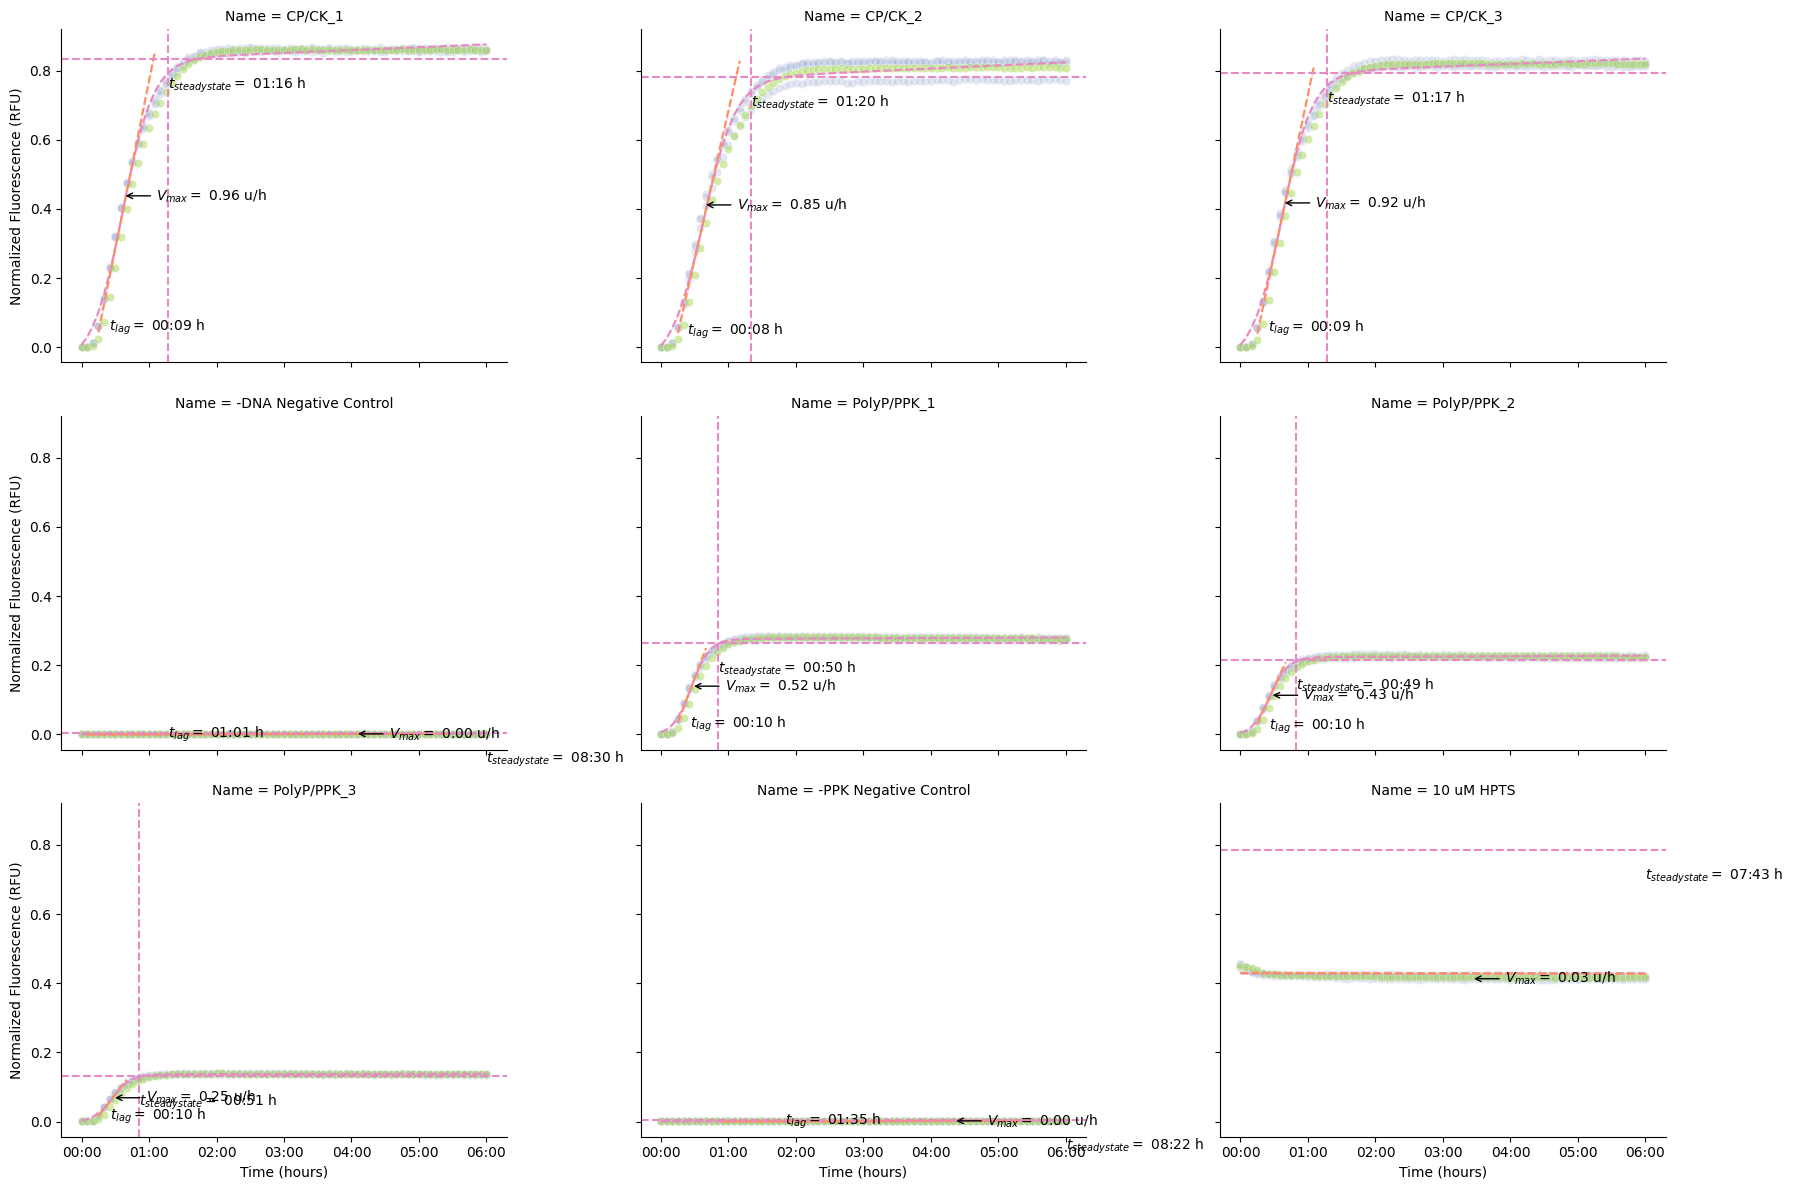

In [9]:
#| label: fig:kinetic-fits-group2

# Plot kinetic fits 
g, kinetics = pr.plot_kinetics(data, kinetics=kinetics, group_by=["Name"])
plt.savefig("kinetic-fits-group2.png")

In [10]:
#| label: tbl:kinetic-param-group2

pr.kinetic_analysis_summary(data)

PROVIDING AVERAGED KINETICS


## Summary Plots

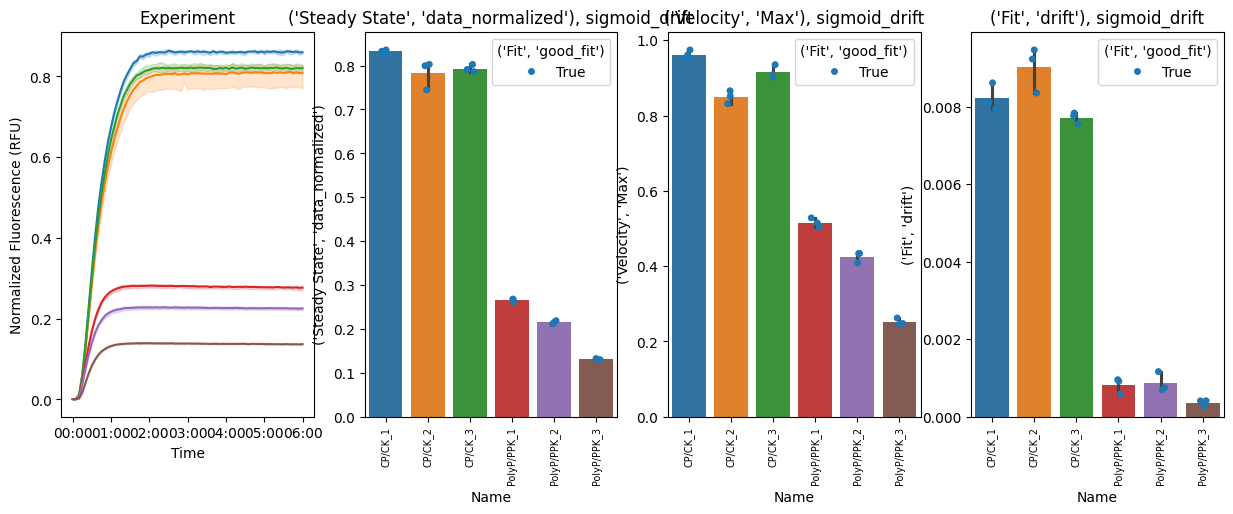

In [11]:
#| label: fig:kinetic-summary-group2

pr.plot_summary(data[data["Sample Type"] == "Sample"], show_plot=False)
plt.savefig("kinetics-summary-group2.png")

---

## Key Metrics Explained

### 1. **Steady-State Level** (`Steady State, Data`)
- The final fluorescence value reached by the reaction
- Represents the total amount of protein produced
- Higher values indicate greater expression yield

### 2. **Maximum Velocity** (`Velocity, Max`)
- The steepest slope of the fluorescence curve (at the inflection point)
- Units: RFU per second
- Reflects the peak rate of protein synthesis
- Sensitive to enzyme activity, substrate availability, and reaction conditions

### 3. **Lag Time** (`Lag, Time`)
- Time before exponential fluorescence increase begins
- May reflect time for ribosome assembly or initial translation steps
- Shorter lag times suggest faster reaction initiation

### 4. **Drift** (`Fit, drift`)
- Rate of fluorescence change after reaching steady-state
- Positive drift: continued synthesis or aggregation
- Negative drift: photobleaching, protein degradation, or quenching
- Units: RFU per second

### 5. **R² Value** (`Fit, R^2`)
- Goodness of fit (0 to 1, higher is better)
- R² > 0.98 indicates excellent fit
- Poor fits may indicate noisy data, overflow errors, or non-sigmoid kinetics

---

## Tips and Troubleshooting

- **Overflow errors:** Wells with `OVRFLW` or `NaN` values are automatically excluded from fitting
- **Poor fits (low R²):** Inspect raw curves for anomalies (bubbles, evaporation, pipetting errors)
- **Drift:** Sometimes seen in kinetics curves; use `sigmoid_drift` model
- **Multiple replicates:** Always include technical replicates and report error bars
- **Comparing conditions:** Normalize or blank data consistently across all samples

---

## Next Steps

- Export kinetics results: `pr.export_kinetics(kinetics, 'results.csv')`
- Statistical analysis: Use `scipy.stats` or `statsmodels` for ANOVA/t-tests
- Parameter optimization: Vary Mg²⁺, K⁺, or other conditions to maximize Vmax or steady-state
- Mechanistic modeling: Fit ODE models to extract biological rate constants